# CS5242

## Load Data

In [1]:
from data import Data
import numpy as np

full_train = Data(data_type='train')

# idx = np.random.permutation(len(full_train.x))
# full_train_x,full_train_y = full_train.x[idx], full_train.y[idx]
full_train_x,full_train_y = full_train.x, full_train.y


del full_train

val_data_x, train_data_x = full_train_x[:full_train_x.shape[0]//5,:], full_train_x[full_train_x.shape[0]//5:,:]
val_data_y,train_data_y = full_train_y[:full_train_y.shape[0]//5,:], full_train_y[full_train_y.shape[0]//5:,:]

print("Train data: x:"+ str(train_data_x.shape)+ ' y:'+str(train_data_y.shape))
print("Validation data: x:"+ str(val_data_x.shape)+ ' y:'+str(val_data_y.shape))



Loading train data 18662/18662: 100%|█████████████████████████████████████████████████████████████ [ time left: 00:00 ]


Train data: x:(14930, 1000, 102) y:(14930, 1)
Validation data: x:(3732, 1000, 102) y:(3732, 1)


## Model

In [2]:
import tensorflow as tf
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

model_name = 'boosting_lstm_pooling'

def create_model(show_summary = False):
    model = tf.keras.Sequential([
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True),input_shape=(1000,102)),
        tf.keras.layers.GlobalMaxPooling1D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(1e-4,0.95,0.99),
                  metrics=['accuracy',tf.keras.metrics.AUC()])
    
    if show_summary:
        model.summary()
    
    return model
    
num_of_bags = 10
epochs_per_bag = 250
start_from_bag = 0


## Training with Boosting

skiping bag 0
Training bag 1
(14930, 1)
(14930,)
[1.06096268e-04 1.90064311e-03 1.09732151e-02 ... 9.41406488e-02
 5.81878424e-03 1.26799881e-01]


Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


(6051, 1)
(6051,)
Saved to result_boosting_lstm_pooling_boost1.csv
[0.99903542 0.99874449 0.99822766 ... 0.00476879 0.00476444 0.00476205]
Train on 5972 samples, validate on 3732 samples
Epoch 1/250
5972/5972 - 9s - loss: 0.7043 - accuracy: 0.5270 - auc_1: 0.5286 - val_loss: 0.7174 - val_accuracy: 0.4266 - val_auc_1: 0.7958
Epoch 2/250
5972/5972 - 7s - loss: 0.6555 - accuracy: 0.6155 - auc_1: 0.6434 - val_loss: 0.6322 - val_accuracy: 0.6667 - val_auc_1: 0.8693
Epoch 3/250
5972/5972 - 7s - loss: 0.6394 - accuracy: 0.6361 - auc_1: 0.6834 - val_loss: 0.6223 - val_accuracy: 0.6442 - val_auc_1: 0.8883
Epoch 4/250
5972/5972 - 7s - loss: 0.6203 - accuracy: 0.6691 - auc_1: 0.7229 - val_loss: 0.6017 - val_accuracy: 0.7128 - val_auc_1: 0.9041
Epoch 5/250
5972/5972 - 7s - loss: 0.6048 - accuracy: 0.6862 - auc_1: 0.7467 - val_loss: 0.5570 - val_accuracy: 0.8325 - val_auc_1: 0.9184
Epoch 6/250
5972/5972 - 7s - loss: 0.5869 - accuracy: 0.7138 - auc_1: 0.7701 - val_loss: 0.5315 - val_accuracy: 0.8502

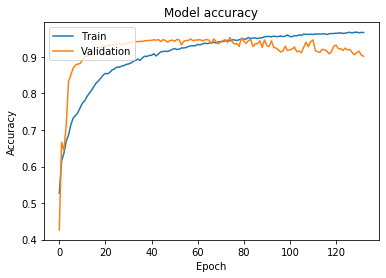

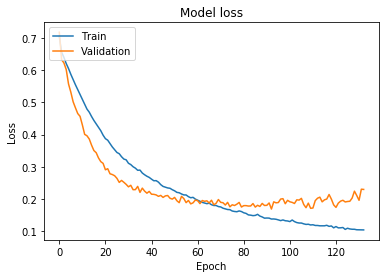

Training bag 2
(14930, 2)
(14930,)
[0.00039333 0.13322859 0.00590685 ... 0.07361063 0.0041281  0.07935083]


Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


(6051, 2)
(6051,)
Saved to result_boosting_lstm_pooling_boost2.csv
[0.98776881 0.98569074 0.98241207 ... 0.02756131 0.0275538  0.02754866]
Train on 5972 samples, validate on 3732 samples
Epoch 1/250
5972/5972 - 9s - loss: 0.6282 - accuracy: 0.6614 - auc_3: 0.6288 - val_loss: 0.7024 - val_accuracy: 0.4496 - val_auc_3: 0.7678
Epoch 2/250
5972/5972 - 7s - loss: 0.5304 - accuracy: 0.7281 - auc_3: 0.8121 - val_loss: 0.6276 - val_accuracy: 0.5533 - val_auc_3: 0.7835
Epoch 3/250
5972/5972 - 7s - loss: 0.4828 - accuracy: 0.7488 - auc_3: 0.8355 - val_loss: 0.6018 - val_accuracy: 0.6265 - val_auc_3: 0.7981
Epoch 4/250
5972/5972 - 7s - loss: 0.4573 - accuracy: 0.7679 - auc_3: 0.8494 - val_loss: 0.5679 - val_accuracy: 0.6535 - val_auc_3: 0.8128
Epoch 5/250
5972/5972 - 7s - loss: 0.4434 - accuracy: 0.7738 - auc_3: 0.8571 - val_loss: 0.5334 - val_accuracy: 0.6902 - val_auc_3: 0.8252
Epoch 6/250
5972/5972 - 7s - loss: 0.4300 - accuracy: 0.7785 - auc_3: 0.8657 - val_loss: 0.5305 - val_accuracy: 0.6849

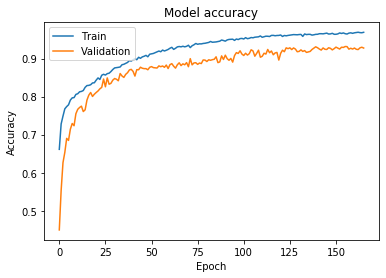

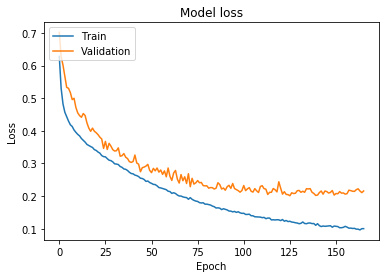

Training bag 3
(14930, 3)
(14930,)
[0.00318813 0.08919907 0.04092366 ... 0.11461078 0.00535899 0.05851132]


Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


(6051, 3)
(6051,)
Saved to result_boosting_lstm_pooling_boost3.csv
[0.97637624 0.96941131 0.94252647 ... 0.04605818 0.04605466 0.04605431]
Train on 5972 samples, validate on 3732 samples
Epoch 1/250
5972/5972 - 11s - loss: 0.6236 - accuracy: 0.6519 - auc_5: 0.6969 - val_loss: 0.6257 - val_accuracy: 0.6066 - val_auc_5: 0.8406
Epoch 2/250
5972/5972 - 7s - loss: 0.5480 - accuracy: 0.7374 - auc_5: 0.8054 - val_loss: 0.5798 - val_accuracy: 0.7393 - val_auc_5: 0.8565
Epoch 3/250
5972/5972 - 7s - loss: 0.5085 - accuracy: 0.7554 - auc_5: 0.8289 - val_loss: 0.5431 - val_accuracy: 0.7677 - val_auc_5: 0.8782
Epoch 4/250
5972/5972 - 7s - loss: 0.4843 - accuracy: 0.7564 - auc_5: 0.8402 - val_loss: 0.5229 - val_accuracy: 0.7690 - val_auc_5: 0.8951
Epoch 5/250
5972/5972 - 7s - loss: 0.4630 - accuracy: 0.7659 - auc_5: 0.8530 - val_loss: 0.5035 - val_accuracy: 0.7677 - val_auc_5: 0.9075
Epoch 6/250
5972/5972 - 7s - loss: 0.4443 - accuracy: 0.7760 - auc_5: 0.8656 - val_loss: 0.4726 - val_accuracy: 0.805

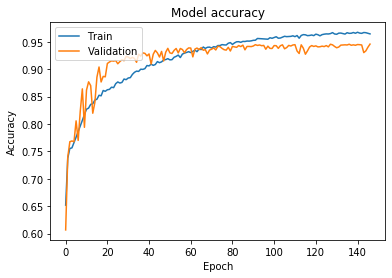

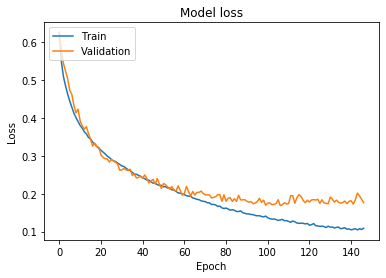

Training bag 4
(14930, 4)
(14930,)
[0.0031684  0.06705822 0.03246801 ... 0.10316998 0.00563723 0.0467152 ]


Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


(6051, 4)
(6051,)
Saved to result_boosting_lstm_pooling_boost4.csv
[0.98190299 0.96542269 0.94702691 ... 0.05744737 0.0574404  0.05743174]
Train on 5972 samples, validate on 3732 samples
Epoch 1/250
5972/5972 - 10s - loss: 0.6283 - accuracy: 0.6520 - auc_7: 0.6817 - val_loss: 0.6102 - val_accuracy: 0.6294 - val_auc_7: 0.8152
Epoch 2/250
5972/5972 - 7s - loss: 0.5652 - accuracy: 0.7120 - auc_7: 0.7789 - val_loss: 0.5718 - val_accuracy: 0.6468 - val_auc_7: 0.8404
Epoch 3/250
5972/5972 - 7s - loss: 0.5298 - accuracy: 0.7421 - auc_7: 0.8092 - val_loss: 0.5464 - val_accuracy: 0.6857 - val_auc_7: 0.8564
Epoch 4/250
5972/5972 - 7s - loss: 0.5040 - accuracy: 0.7539 - auc_7: 0.8294 - val_loss: 0.5207 - val_accuracy: 0.7425 - val_auc_7: 0.8756
Epoch 5/250
5972/5972 - 7s - loss: 0.4873 - accuracy: 0.7602 - auc_7: 0.8401 - val_loss: 0.4791 - val_accuracy: 0.7792 - val_auc_7: 0.8842
Epoch 6/250
5972/5972 - 7s - loss: 0.4694 - accuracy: 0.7674 - auc_7: 0.8515 - val_loss: 0.4534 - val_accuracy: 0.799

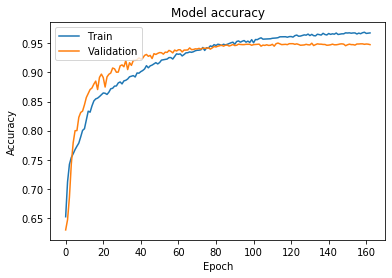

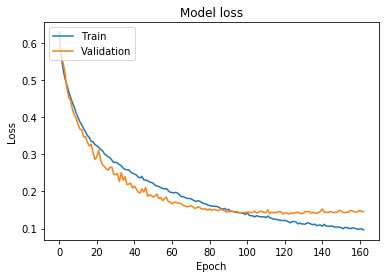

Training bag 5
(14930, 5)
(14930,)
[0.0026083  0.05385096 0.05033049 ... 0.10025313 0.02870482 0.04781008]


Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


(6051, 5)
(6051,)
Saved to result_boosting_lstm_pooling_boost5.csv
[0.98441771 0.94218484 0.94083952 ... 0.05274945 0.05273573 0.0527144 ]
Train on 5972 samples, validate on 3732 samples
Epoch 1/250
5972/5972 - 10s - loss: 0.6498 - accuracy: 0.6299 - auc_9: 0.6178 - val_loss: 0.6310 - val_accuracy: 0.6535 - val_auc_9: 0.8507
Epoch 2/250
5972/5972 - 7s - loss: 0.5824 - accuracy: 0.6952 - auc_9: 0.7633 - val_loss: 0.5763 - val_accuracy: 0.7170 - val_auc_9: 0.8683
Epoch 3/250
5972/5972 - 7s - loss: 0.5459 - accuracy: 0.7272 - auc_9: 0.7939 - val_loss: 0.5208 - val_accuracy: 0.8100 - val_auc_9: 0.8823
Epoch 4/250
5972/5972 - 7s - loss: 0.5253 - accuracy: 0.7338 - auc_9: 0.8070 - val_loss: 0.5129 - val_accuracy: 0.7872 - val_auc_9: 0.8983
Epoch 5/250
5972/5972 - 7s - loss: 0.5062 - accuracy: 0.7456 - auc_9: 0.8221 - val_loss: 0.4634 - val_accuracy: 0.8430 - val_auc_9: 0.9107
Epoch 6/250
5972/5972 - 7s - loss: 0.4878 - accuracy: 0.7549 - auc_9: 0.8372 - val_loss: 0.4437 - val_accuracy: 0.848

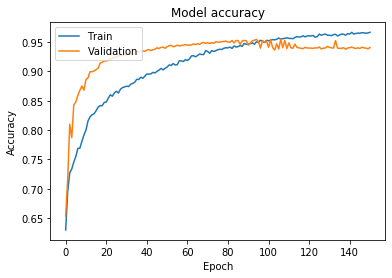

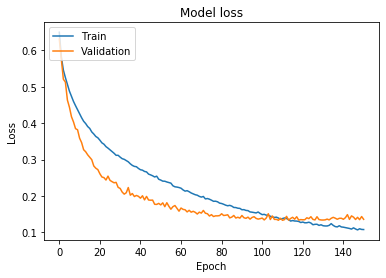

Training bag 6
(14930, 6)
(14930,)
[0.00225466 0.04506799 0.04305141 ... 0.09900575 0.06513745 0.04000682]


Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


(6051, 6)
(6051,)
Saved to result_boosting_lstm_pooling_boost6.csv
[0.98561253 0.94853733 0.94290906 ... 0.04917961 0.04915982 0.0491581 ]
Train on 5972 samples, validate on 3732 samples
Epoch 1/250
5972/5972 - 10s - loss: 0.6659 - accuracy: 0.5799 - auc_11: 0.5889 - val_loss: 0.6858 - val_accuracy: 0.4081 - val_auc_11: 0.8279
Epoch 2/250
5972/5972 - 7s - loss: 0.6033 - accuracy: 0.6673 - auc_11: 0.7353 - val_loss: 0.6114 - val_accuracy: 0.6557 - val_auc_11: 0.8563
Epoch 3/250
5972/5972 - 7s - loss: 0.5726 - accuracy: 0.6949 - auc_11: 0.7674 - val_loss: 0.5650 - val_accuracy: 0.7492 - val_auc_11: 0.8788
Epoch 4/250
5972/5972 - 7s - loss: 0.5526 - accuracy: 0.7085 - auc_11: 0.7833 - val_loss: 0.5258 - val_accuracy: 0.8234 - val_auc_11: 0.8988
Epoch 5/250
5972/5972 - 7s - loss: 0.5267 - accuracy: 0.7296 - auc_11: 0.8097 - val_loss: 0.5137 - val_accuracy: 0.8167 - val_auc_11: 0.9177
Epoch 6/250
5972/5972 - 6s - loss: 0.5094 - accuracy: 0.7433 - auc_11: 0.8256 - val_loss: 0.4653 - val_accu

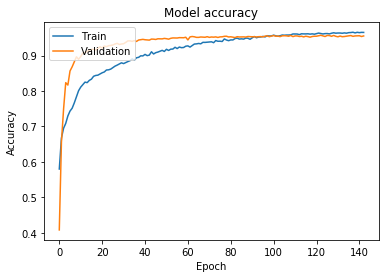

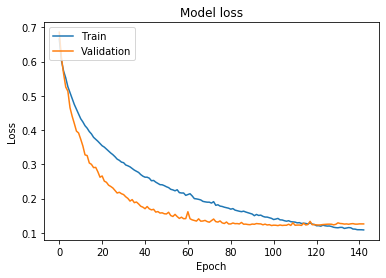

Training bag 7
(14930, 7)
(14930,)
[0.00197846 0.03889254 0.03786832 ... 0.1017888  0.05607837 0.05431789]


Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


(6051, 7)
(6051,)
Saved to result_boosting_lstm_pooling_boost7.csv
[0.98590132 0.95563288 0.94025165 ... 0.04465669 0.04465559 0.04465169]
Train on 5972 samples, validate on 3732 samples
Epoch 1/250
5972/5972 - 11s - loss: 0.6695 - accuracy: 0.5777 - auc_13: 0.5847 - val_loss: 0.6668 - val_accuracy: 0.4855 - val_auc_13: 0.8265
Epoch 2/250
5972/5972 - 7s - loss: 0.6021 - accuracy: 0.6731 - auc_13: 0.7377 - val_loss: 0.5913 - val_accuracy: 0.7377 - val_auc_13: 0.8480
Epoch 3/250
5972/5972 - 7s - loss: 0.5745 - accuracy: 0.7023 - auc_13: 0.7651 - val_loss: 0.5569 - val_accuracy: 0.7934 - val_auc_13: 0.8741
Epoch 4/250
5972/5972 - 7s - loss: 0.5533 - accuracy: 0.7152 - auc_13: 0.7861 - val_loss: 0.5278 - val_accuracy: 0.8250 - val_auc_13: 0.8982
Epoch 5/250
5972/5972 - 7s - loss: 0.5345 - accuracy: 0.7314 - auc_13: 0.8029 - val_loss: 0.5049 - val_accuracy: 0.8374 - val_auc_13: 0.9182
Epoch 6/250
5972/5972 - 7s - loss: 0.5165 - accuracy: 0.7376 - auc_13: 0.8196 - val_loss: 0.4777 - val_accu

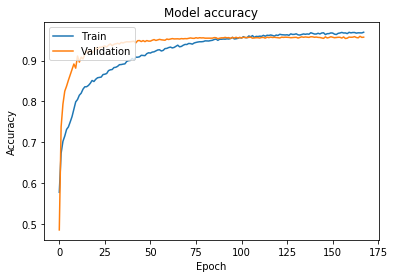

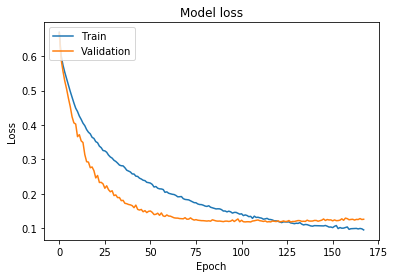

Training bag 8
(14930, 8)
(14930,)
[0.0017364  0.03427511 0.03397579 ... 0.09861911 0.04944432 0.04756379]


Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


(6051, 8)
(6051,)
Saved to result_boosting_lstm_pooling_boost8.csv
[0.98507386 0.96096402 0.94227362 ... 0.04021758 0.04020017 0.04019532]
Train on 5972 samples, validate on 3732 samples
Epoch 1/250
5972/5972 - 9s - loss: 0.6937 - accuracy: 0.5551 - auc_15: 0.5551 - val_loss: 0.7255 - val_accuracy: 0.4113 - val_auc_15: 0.7977
Epoch 2/250
5972/5972 - 7s - loss: 0.6273 - accuracy: 0.6510 - auc_15: 0.6913 - val_loss: 0.6379 - val_accuracy: 0.5823 - val_auc_15: 0.8446
Epoch 3/250
5972/5972 - 7s - loss: 0.5955 - accuracy: 0.6849 - auc_15: 0.7384 - val_loss: 0.5910 - val_accuracy: 0.6742 - val_auc_15: 0.8612
Epoch 4/250
5972/5972 - 7s - loss: 0.5741 - accuracy: 0.7014 - auc_15: 0.7622 - val_loss: 0.5596 - val_accuracy: 0.7658 - val_auc_15: 0.8822
Epoch 5/250
5972/5972 - 7s - loss: 0.5542 - accuracy: 0.7137 - auc_15: 0.7824 - val_loss: 0.5194 - val_accuracy: 0.8288 - val_auc_15: 0.9005
Epoch 6/250
5972/5972 - 7s - loss: 0.5386 - accuracy: 0.7240 - auc_15: 0.7970 - val_loss: 0.4924 - val_accur

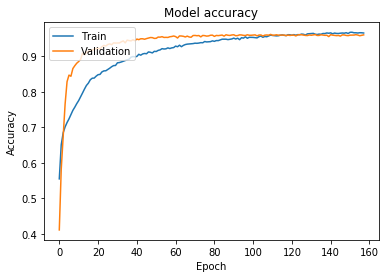

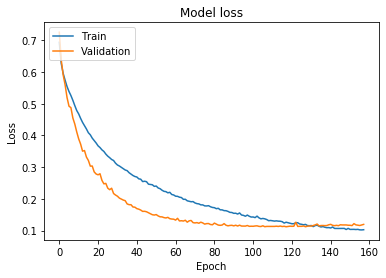

Training bag 9
(14930, 9)
(14930,)
[0.00154644 0.03071425 0.03042252 ... 0.09979998 0.04445338 0.0425697 ]


Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


(6051, 9)
(6051,)
Saved to result_boosting_lstm_pooling_boost9.csv
[0.98522859 0.96501646 0.94419755 ... 0.03687702 0.03685433 0.03685308]
Train on 5972 samples, validate on 3732 samples
Epoch 1/250
5972/5972 - 11s - loss: 0.6550 - accuracy: 0.6065 - auc_17: 0.6299 - val_loss: 0.6441 - val_accuracy: 0.5681 - val_auc_17: 0.8365
Epoch 2/250
5972/5972 - 7s - loss: 0.6057 - accuracy: 0.6741 - auc_17: 0.7258 - val_loss: 0.5963 - val_accuracy: 0.7093 - val_auc_17: 0.8641
Epoch 3/250
5972/5972 - 7s - loss: 0.5816 - accuracy: 0.6929 - auc_17: 0.7542 - val_loss: 0.5757 - val_accuracy: 0.7425 - val_auc_17: 0.8918
Epoch 4/250
5972/5972 - 7s - loss: 0.5628 - accuracy: 0.7070 - auc_17: 0.7744 - val_loss: 0.5431 - val_accuracy: 0.8111 - val_auc_17: 0.9130
Epoch 5/250
5972/5972 - 7s - loss: 0.5459 - accuracy: 0.7210 - auc_17: 0.7909 - val_loss: 0.4994 - val_accuracy: 0.8572 - val_auc_17: 0.9235
Epoch 6/250
5972/5972 - 7s - loss: 0.5293 - accuracy: 0.7378 - auc_17: 0.8074 - val_loss: 0.4790 - val_accu

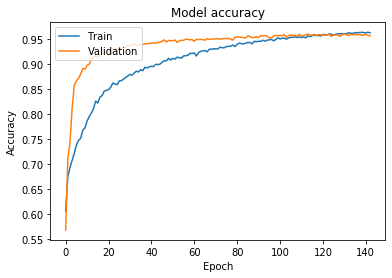

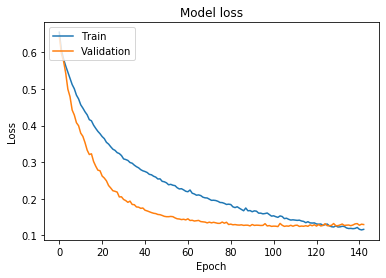

In [3]:
import os
import matplotlib.pyplot as plt
import csv
import math
from data import Data

%matplotlib inline
    
training_loss = np.ones(train_data_x.shape[0])

for bag in range(num_of_bags):
    # skip training
    if bag < start_from_bag:
        print("skiping bag "+str(bag))
        continue
    print("Training bag "+str(bag))

    # Put data into bags
    model = create_model(False)
    train_size = train_data_x.shape[0]//10*4
    if bag != 0 :
        # Check prediction for training data
        for validate_bag in range(bag):
            checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(validate_bag)
            model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
            if validate_bag == 0:
                predictions = model.predict(train_data_x)
            else:
                predictions = np.concatenate((predictions,model.predict(train_data_x)),axis=1)
        print(predictions.shape)

        avg_predictions = np.mean(predictions, axis=1)
        print(avg_predictions.shape)
        
        # Select training data poorly predicted 
        training_loss = avg_predictions-np.reshape(train_data_y,(train_data_y.shape[0]))
        training_loss = np.absolute(training_loss)
        print(training_loss)
        
        # Save Predictions for test data
        test_data = Data(data_type='test')
        for validate_bag in range(bag):
            checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(validate_bag)
            model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
            if validate_bag == 0:
                predictions = model.predict(test_data.x)
            else:
                predictions = np.concatenate((predictions,model.predict(test_data.x)),axis=1)
        print(predictions.shape)

        avg_predictions = np.mean(predictions, axis=1)
        print(avg_predictions.shape)
        
        output_file = 'result_' + model_name +'_boost'+ str(bag) +'.csv'
        with open(output_file, 'wt', newline='', encoding='utf-8') as output_file:
            csv_writer = csv.writer(output_file)
            csv_writer.writerow(('Id', 'Predicted'))
            for id, predict in enumerate(avg_predictions):
                csv_writer.writerow((id, predict))
        print('Saved to '+'result_' + model_name +'_boost'+ str(bag) +'.csv')
        # Free memory space for test data
        del test_data
        
        
    
    idx = (-training_loss).argsort()[:train_size]
    print(training_loss[idx])
    bag_x,bag_y = train_data_x[idx], train_data_y[idx]
        
    del model
        
    ## TODO define different models if possible
    model = create_model(bag==0)
    # Directory where the checkpoints will be saved
    checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(bag)
    # Name of the checkpoint files
    checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

    checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_prefix,
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=True)

    early_stopping_callback = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        min_delta=0, 
        patience=40, 
        mode='auto', 
        restore_best_weights=True)
        
        
        
    history = model.fit(x=bag_x,y=bag_y, validation_data=(val_data_x,val_data_y), epochs=epochs_per_bag,batch_size=128,
                    callbacks=[checkpoint_callback,early_stopping_callback], verbose=2,shuffle=True)
    
    print()
    
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
    del model,history,bag_x,bag_y
    

## Restore Weights

In [4]:
checkpoint_dir = './checkpoints/' + model_name
model = create_model()

import numpy as np
from data import Data

test_data = Data(data_type='test')
print("Test data: x:"+ str(test_data.x.shape)+ ' y:'+str(test_data.y.shape))

for bag in range(num_of_bags):
    checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(bag)
    model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
    if bag == 0:
        predictions = model.predict(test_data.x)
    else:
        predictions = np.concatenate((predictions,model.predict(test_data.x)),axis=1)
print(predictions.shape)

avg_predictions = np.mean(predictions, axis=1)
print(avg_predictions.shape)

Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


Test data: x:(6051, 1000, 102) y:(6051, 1)
(6051, 10)
(6051,)




## Save Prediction to CSV

In [5]:
import csv

output_file = 'result_' + model_name + '.csv'
with open(output_file, 'wt', newline='', encoding='utf-8') as output_file:
    csv_writer = csv.writer(output_file)
    csv_writer.writerow(('Id', 'Predicted'))
    for id, predict in enumerate(avg_predictions):
        csv_writer.writerow((id, predict))
print('Saved to '+'result_' + model_name + '.csv')

Saved to result_boosting_lstm_pooling.csv
